In [74]:
import pandas as pd
from os import path
from tqdm import tqdm
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
np.random.seed(5)

In [75]:
kaggle_movies_df = pd.read_csv('https://raw.githubusercontent.com/sahildit/IMDB-Movies-Extensive-Dataset-Analysis/master/data1/IMDb%20movies.csv', sep=',', encoding='utf-8')

/data/home/spushkov/.conda/envs/ent_rel_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3369: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [76]:
kaggle_movies_df = kaggle_movies_df.dropna(subset=['description'])

kaggle_movies_df = kaggle_movies_df[['imdb_title_id', 'title', 'original_title', 'description', 'genre', 'year']]
kaggle_movies_df['genres_list'] = kaggle_movies_df['genre'].str.split(", ")
kaggle_movies_df['first_genre'] = kaggle_movies_df.genres_list.apply(lambda x: x[0])


In [77]:
kaggle_movies_df

,imdb_title_id,title,original_title,description,genre,year,genres_list,first_genre
0,tt0000009,Miss Jerry,Miss Jerry,The adventures of a female reporter in the 1890s.,Romance,1894,[Romance],Romance
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,True story of notorious Australian outlaw Ned ...,"Biography, Crime, Drama",1906,"[Biography, Crime, Drama]",Biography
2,tt0001892,Den sorte drøm,Den sorte drøm,Two men of high rank are both wooing the beaut...,Drama,1911,[Drama],Drama
3,tt0002101,Cleopatra,Cleopatra,The fabled queen of Egypt's affair with Roman ...,"Drama, History",1912,"[Drama, History]",Drama
4,tt0002130,L'Inferno,L'Inferno,Loosely adapted from Dante's Divine Comedy and...,"Adventure, Drama, Fantasy",1911,"[Adventure, Drama, Fantasy]",Adventure
...,...,...,...,...,...,...,...,...
85848,tt9905462,Pengalila,Pengalila,An unusual bond between a sixty year old Dalit...,Drama,2019,[Drama],Drama
85849,tt9906644,Manoharam,Manoharam,Manoharan is a poster artist struggling to fin...,"Comedy, Drama",2019,"[Comedy, Drama]",Comedy
85850,tt9908390,Le lion,Le lion,A psychiatric hospital patient pretends to be ...,Comedy,2020,[Comedy],Comedy
85851,tt9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,A middle-aged veterinary surgeon believes his ...,"Comedy, Drama",2020,"[Comedy, Drama]",Comedy


In [78]:
title_ids_grouped_by_year = kaggle_movies_df.groupby('year').imdb_title_id.apply(list)

In [79]:
title_ids_grouped_by_year

year
1894                                                   [tt0000009]
1906                                                   [tt0000574]
1911             [tt0001892, tt0002130, tt0191323, tt0194248, t...
1912             [tt0002101, tt0002199, tt0002452, tt0002461, t...
1913             [tt0002445, tt0002646, tt0002844, tt0003014, t...
                                       ...                        
2017             [tt2226597, tt2238758, tt2239822, tt2241475, t...
2018             [tt2226440, tt2231461, tt2233979, tt2237324, t...
2019             [tt2257284, tt2274648, tt2275629, tt2275743, t...
2020             [tt2420124, tt2573372, tt2702920, tt2819446, t...
TV Movie 2019                                          [tt8206668]
Name: imdb_title_id, Length: 168, dtype: object

In [80]:
def define_paths_to_imgs_kaggle(data, path_to_folder="./Poster/"):

    list_of_available_posters = []
    for y, t in tqdm(data.iteritems(), total=len(data)):

        for id_ in t:
            if path.exists(path.join(path_to_folder, f"{y}/{id_}/{id_}.jpg")):
                list_of_available_posters.append({'imdb_title_id': id_, 'img_path': path.join(path_to_folder, f"{y}/{id_}/{id_}.jpg")})
            elif path.exists(path.join(path_to_folder, f"0/{id_}/{id_}.jpg")):
                list_of_available_posters.append({'imdb_title_id': id_, 'img_path': path.join(path_to_folder, f"0/{id_}/{id_}.jpg")})
    img_paths_df = pd.DataFrame(list_of_available_posters)
    return img_paths_df


In [81]:
img_paths_df = define_paths_to_imgs_kaggle(title_ids_grouped_by_year)

100%|██████████| 168/168 [00:38<00:00,  4.40it/s]


In [82]:
img_paths_df

,imdb_title_id,img_path
0,tt0000574,./Poster/1906/tt0000574/tt0000574.jpg
1,tt0002130,./Poster/1911/tt0002130/tt0002130.jpg
2,tt0002101,./Poster/1912/tt0002101/tt0002101.jpg
3,tt0002461,./Poster/1912/tt0002461/tt0002461.jpg
4,tt0002844,./Poster/1913/tt0002844/tt0002844.jpg
...,...,...
29838,tt8580274,./Poster/2020/tt8580274/tt8580274.jpg
29839,tt8850222,./Poster/2020/tt8850222/tt8850222.jpg
29840,tt9484998,./Poster/2020/tt9484998/tt9484998.jpg
29841,tt9777644,./Poster/2020/tt9777644/tt9777644.jpg


In [83]:
kaggle_preprocessed = pd.merge(left=kaggle_movies_df, right=img_paths_df, on='imdb_title_id', how='inner')

In [84]:
kaggle_preprocessed

,imdb_title_id,title,original_title,description,genre,year,genres_list,first_genre,img_path
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,True story of notorious Australian outlaw Ned ...,"Biography, Crime, Drama",1906,"[Biography, Crime, Drama]",Biography,./Poster/1906/tt0000574/tt0000574.jpg
1,tt0002101,Cleopatra,Cleopatra,The fabled queen of Egypt's affair with Roman ...,"Drama, History",1912,"[Drama, History]",Drama,./Poster/1912/tt0002101/tt0002101.jpg
2,tt0002130,L'Inferno,L'Inferno,Loosely adapted from Dante's Divine Comedy and...,"Adventure, Drama, Fantasy",1911,"[Adventure, Drama, Fantasy]",Adventure,./Poster/1911/tt0002130/tt0002130.jpg
3,tt0002461,Richard III,Richard III,Richard of Gloucester uses manipulation and mu...,Drama,1912,[Drama],Drama,./Poster/1912/tt0002461/tt0002461.jpg
4,tt0002844,Fantômas - À l'ombre de la guillotine,Fantômas - À l'ombre de la guillotine,Inspector Juve is tasked to investigate and ca...,"Crime, Drama",1913,"[Crime, Drama]",Crime,./Poster/1913/tt0002844/tt0002844.jpg
...,...,...,...,...,...,...,...,...,...
29838,tt8850222,Peninsula,Train to Busan 2,Sequel to the 2016 South Korean zombie film,"Action, Horror, Thriller",2020,"[Action, Horror, Thriller]",Action,./Poster/2020/tt8850222/tt8850222.jpg
29839,tt8946378,Cena con delitto - Knives Out,Knives Out,A detective investigates the death of a patria...,"Comedy, Crime, Drama",2019,"[Comedy, Crime, Drama]",Comedy,./Poster/2019/tt8946378/tt8946378.jpg
29840,tt9484998,Palm Springs,Palm Springs,When carefree Nyles and reluctant maid of hono...,"Comedy, Fantasy, Mystery",2020,"[Comedy, Fantasy, Mystery]",Comedy,./Poster/2020/tt9484998/tt9484998.jpg
29841,tt9777644,Da 5 Bloods - Come fratelli,Da 5 Bloods,Four African American vets battle the forces o...,"Adventure, Drama, War",2020,"[Adventure, Drama, War]",Adventure,./Poster/2020/tt9777644/tt9777644.jpg


In [85]:
manually_parsed = pd.read_csv('./our_data/manually_parsed_movies.csv')

In [86]:
manually_parsed = manually_parsed.rename({'id': 'imdb_title_id', 'plot': 'description', 'genre': 'first_genre', 'image': 'img_path'}, axis=1)

In [87]:
manually_parsed = manually_parsed.drop_duplicates()

In [88]:
manually_parsed

,imdb_title_id,img_path,title,first_genre,description
0,tt9592704,https://m.media-amazon.com/images/M/MV5BNWMwNm...,Supernoobs,Fantasy,Zen and Mem are experiencing their second snow...
1,tt9570536,https://m.media-amazon.com/images/M/MV5BNmJmNj...,Supernoobs,Fantasy,The Noobs crash land the Galacticus on a stran...
2,tt9570404,https://m.media-amazon.com/images/M/MV5BNjU2OD...,Supernoobs,Fantasy,Power's out in Cornbury. The Noobs just want t...
3,tt9570394,https://m.media-amazon.com/images/M/MV5BMjA3YT...,Supernoobs,Fantasy,The Noobs are given super underwater suits. Th...
4,tt9570280,https://m.media-amazon.com/images/M/MV5BODU2ZG...,Supernoobs,Fantasy,Mem and Zen fall under scrutiny from the Benev...
...,...,...,...,...,...
5264,tt4625048,https://m.media-amazon.com/images/M/MV5BMTgzOT...,Daredevil,Superhero,"In the void left by Fisk's removal, a new thre..."
5265,tt4586672,https://m.media-amazon.com/images/M/MV5BMTk5Mj...,Superseven Unchained,Superhero,T.H.E.Y. has programmed Sandra West to become ...
5266,tt4012658,https://m.media-amazon.com/images/M/MV5BYTNlYz...,Comic Splash: The web-series,Superhero,Tyler Simpson hosts an online TV show satirica...
5267,tt3179670,https://m.media-amazon.com/images/M/MV5BMGY5ZD...,The Sentry,Superhero,"Bob Reynolds, a recovered alcoholic teetering ..."


In [89]:
def define_paths_to_imgs_custom(data, path_to_folder="./db_posters/"):

    list_of_available_posters = []
    for _, t in tqdm(data[['imdb_title_id']].iterrows(), total=len(data[['imdb_title_id']])):
  
      if path.exists(path.join(path_to_folder, f"{t.imdb_title_id}.jpg")):
          list_of_available_posters.append({'imdb_title_id': t.imdb_title_id, 'img_path': path.join(path_to_folder, f"{t.imdb_title_id}.jpg")})

    img_paths_df = pd.DataFrame(list_of_available_posters)
    return img_paths_df


In [90]:
custom_img_paths_df = define_paths_to_imgs_custom(manually_parsed)

100%|██████████| 4913/4913 [00:00<00:00, 8915.41it/s] 


In [91]:
custom_img_paths_df

,imdb_title_id,img_path
0,tt15498166,./db_posters/tt15498166.jpg
1,tt10233448,./db_posters/tt10233448.jpg
2,tt1100089,./db_posters/tt1100089.jpg
3,tt0106611,./db_posters/tt0106611.jpg
4,tt1057500,./db_posters/tt1057500.jpg
...,...,...
580,tt5215750,./db_posters/tt5215750.jpg
581,tt4586672,./db_posters/tt4586672.jpg
582,tt4012658,./db_posters/tt4012658.jpg
583,tt3179670,./db_posters/tt3179670.jpg


In [92]:
manually_parsed = manually_parsed.drop(['img_path'], axis=1)
custom_preprocessed = pd.merge(left=manually_parsed, right=custom_img_paths_df, on='imdb_title_id', how='inner')

In [93]:
custom_preprocessed = custom_preprocessed.drop_duplicates('imdb_title_id')

In [95]:
final_dataset = pd.concat([kaggle_preprocessed[['imdb_title_id', 'img_path', 'title', 'first_genre', 'description']], custom_preprocessed], axis=0, ignore_index=True)
final_dataset = final_dataset[~final_dataset.first_genre.isin(['Adult'])]

In [98]:
list_of_dfs = []
for genre in final_dataset.first_genre.value_counts().index:
    df = final_dataset[final_dataset['first_genre']==genre]
    if len(df) >= 200:
        list_of_dfs.append(df.sample(200))
    else:
        list_of_dfs.append(df)

In [99]:
each_genre200 = pd.concat(list_of_dfs, axis=0, ignore_index=True)

In [101]:
each_genre200 = each_genre200[~(each_genre200.first_genre=='Documentary')]

In [102]:
each_genre200.to_csv("./our_data/each_genre200.csv", index=False)

In [103]:
each_genre200 = pd.read_csv("./our_data/each_genre200.csv")

In [104]:
each_genre200

,imdb_title_id,img_path,title,first_genre,description
0,tt1065106,./Poster/2007/tt1065106/tt1065106.jpg,Pigs,Comedy,"Ladies' man Miles takes a challenge to ""comple..."
1,tt0085384,./Poster/1983/tt0085384/tt0085384.jpg,Pantera rosa - Il mistero Clouseau,Comedy,Ensuing after the events of Clouseau's disappe...
2,tt7431894,./Poster/2017/tt7431894/tt7431894.jpg,Xiu xiu de tie quan,Comedy,A male UFC boxer switches bodies with the fema...
3,tt1490759,./Poster/2010/tt1490759/tt1490759.jpg,Sex - Una commedia sentimentalmente scorretta,Comedy,Juanjo is a college professor who just got dum...
4,tt0278501,./Poster/1990/tt0278501/tt0278501.jpg,In Harihar Nagar,Comedy,Four unemployed men try to impress a new neigh...
...,...,...,...,...,...
3217,tt0043251,./Poster/1951/tt0043251/tt0043251.jpg,La penna rossa,Film-Noir,Respectable citizens receive anonymous letters...
3218,tt0045205,./Poster/1952/tt0045205/tt0045205.jpg,So che mi ucciderai,Film-Noir,After an ambitious actor insinuates himself in...
3219,tt0046126,./Poster/1953/tt0046126/tt0046126.jpg,Niagara,Film-Noir,"As two couples are visiting Niagara Falls, ten..."
3220,tt0047976,./Poster/1955/tt0047976/tt0047976.jpg,Dementia,Film-Noir,"This film, with no dialogue at all, follows a ..."


In [105]:
each_genre200.first_genre.value_counts()

Comedy       200
Drama        200
Action       200
Crime        200
Horror       200
Adventure    200
Animation    200
Biography    200
Thriller     200
Fantasy      200
Superhero    200
Western      191
Mystery      169
Romance      144
Sport        127
Family       124
Sci-Fi       108
Musical       71
War           27
Music         24
History       19
Film-Noir     18
Name: first_genre, dtype: int64

## Fine tuning

In [106]:
from tensorflow.keras.preprocessing.image import load_img, array_to_img
from tensorflow import keras
import tensorflow as tf
from keras.utils import to_categorical
from tensorflow.keras.layers import Input, Conv2D, Concatenate, MaxPooling2D, Flatten, Dense, Activation, Dropout, GlobalAveragePooling2D

from keras import Model, optimizers
from keras.applications import xception
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pickle


class PosterSequence(keras.utils.Sequence):
    
    def __init__(self, batch_size, img_size, images_paths, labels):
        self.batch_size = batch_size
        self.img_size = img_size
        self.images_paths = images_paths
        self.labels = labels
        self.num_classes = len(set(self.labels))
    
    def __len__(self):
        length = len(self.images_paths) // self.batch_size
        return length
    
    def __getitem__(self, idx):
        x = np.zeros((self.batch_size, ) + self.img_size + (3, ), dtype="float32")
        y = np.zeros((self.batch_size, ) + (self.num_classes, ), dtype="uint8")
        """
        This method returns the batches themselves including images (x) and masks (y) as np.array
            img / 255.0 for images, so that each value is adjacent to the interval [0, 1]
        """
        
        batch_x = self.images_paths[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.labels[idx * self.batch_size:(idx + 1) * self.batch_size]
        
        x = np.array([keras.preprocessing.image.img_to_array(load_img(file_name, color_mode='rgb', target_size=self.img_size, interpolation='nearest', keep_aspect_ratio=False), dtype="float32") / 255.0 for file_name in batch_x])
        y = np.array([to_categorical(label, num_classes=self.num_classes) for label in batch_y])
        return x, y 

In [107]:
le = preprocessing.LabelEncoder()
le.fit(each_genre200['first_genre'])
each_genre200['genre_encoded'] = le.transform(each_genre200['first_genre'])

In [111]:
X_train = each_genre200.img_path.values
y_train = each_genre200.genre_encoded.values
image_size = (192, 128)
b_size = len(X_train)# 128
train_gen = PosterSequence(b_size, image_size, X_train, y_train)


In [112]:
keras.backend.clear_session()


base_model = tf.keras.applications.MobileNetV2(input_shape=image_size+(3, ),
                                                  include_top=False,
                                                  weights='imagenet')


In [113]:
prediction = base_model.predict(train_gen)

1/1 [==============================] - 18s 18s/step


In [115]:
prediction.shape# .flatten().shape

(3222, 6, 4, 1280)

In [116]:
prediction_reshaped  = prediction.reshape(len(X_train), -1)

In [117]:
prediction_reshaped.shape

(3222, 30720)

In [118]:
np.save('extracted_feature.npy', prediction_reshaped)

In [119]:
from sklearn.decomposition import PCA
pca = PCA(n_components=96, svd_solver='full')
comps = pca.fit_transform(prediction_reshaped)

In [120]:
pca_features = pd.concat([pd.DataFrame(comps), pd.DataFrame(y_train, columns=['label'])], axis=1)

In [172]:
X_train, X_test, y_train, y_test = train_test_split(pca_features.drop('label', axis=1), pca_features.label.values, test_size=0.10, random_state=42, shuffle=True)

In [135]:
#Fit Logistic Regression model:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial').fit(X_train, y_train)
# from lightgbm import LGBMClassifier
# lgbm = LGBMClassifier(n_jobs=25)
# lgbm.fit(X_train, y_train)

/data/home/spushkov/.conda/envs/ent_rel_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [126]:
labels = pd.DataFrame({'labels': y_train}).labels.value_counts().index

In [130]:
le.inverse_transform(labels)

array(['Superhero', 'Crime', 'Horror', 'Thriller', 'Fantasy', 'Biography',
       'Adventure', 'Western', 'Animation', 'Action', 'Drama', 'Comedy',
       'Mystery', 'Romance', 'Sport', 'Family', 'Sci-Fi', 'Musical',
       'War', 'Music', 'History', 'Film-Noir'], dtype=object)

In [136]:
from sklearn.metrics import confusion_matrix

y_pred = lr.predict(X_test)
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred, labels=labels)


In [137]:
cm_df = pd.DataFrame(cm, index = le.inverse_transform(labels), columns = le.inverse_transform(labels))


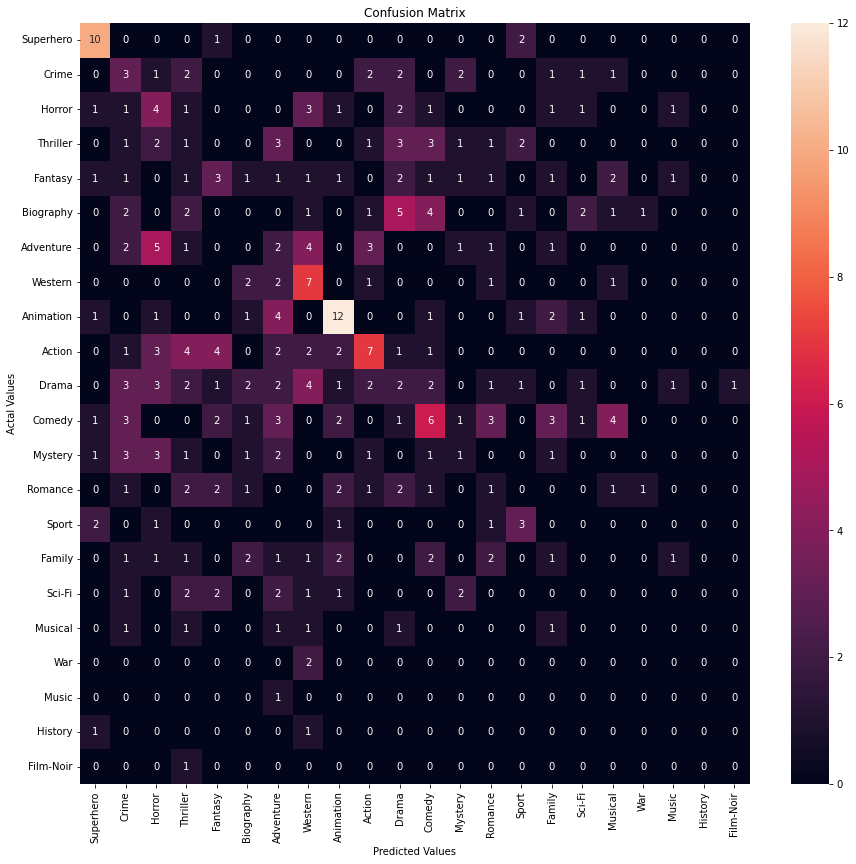

In [138]:
#Plotting the confusion matrix
plt.figure(figsize=(15,14))
sns.heatmap(cm_df, annot=True, fmt=".0f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [190]:
from sklearn.metrics import roc_auc_score

# Generate membership scores with .predict_proba
y_pred_probs = lr.predict_proba(X_test)

# Calculate ROC_AUC
roc_auc = roc_auc_score(
    y_test, y_pred_probs, multi_class="ovr", average="weighted"
  )

In [191]:
y_pred_cv = lr.predict(X_test)

In [140]:
roc_auc

0.7059696614238237

In [223]:
precision_score(y_test,y_pred_cv,average="weighted")

/data/home/spushkov/.conda/envs/ent_rel_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.18721391728656997

# Word2Vec

In [141]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) | set(stopwords.words('french')) | set(stopwords.words('italian'))

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /data/home/spushkov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /data/home/spushkov/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /data/home/spushkov/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /data/home/spushkov/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /data/home/spushkov/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /data/home/spushkov/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# ! kaggle datasets download -d leadbest/googlenewsvectorsnegative300

In [155]:
# import zipfile
# with zipfile.ZipFile('./googlenewsvectorsnegative300.zip', 'r') as zip_ref:
#     zip_ref.extractall('./')

In [157]:
import gensim
w2vec = gensim.models.KeyedVectors.load_word2vec_format(
    "./GoogleNews-vectors-negative300.bin.gz", binary=True
)

In [166]:
import re
def clean_text(text):
    text = re.sub(r"[^\w\s]", "", text, re.UNICODE)
    text = text.lower()
    text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
    text = [word for word in text if not word in stop_words]
    text = " ".join(text)
    text = ' '.join(text.split())
    return text

def create_avg_w2v_vectors(sentence):
    avg_vector = np.zeros(300)
    for word in sentence:
        if (word in w2vec):
            avg_vector += w2vec[word]
    if (len(sentence)==0):
        return avg_vector
    return avg_vector/len(sentence)

def extract_XY(df):
    X = df[['title','description', 'imdb_title_id']]
    y_encoded = df['genre_encoded']
    X['cleaned_titles'] = X['title'].apply(lambda x: clean_text(x))
    X['cleaned_descriptions'] = X['description'].apply(lambda x: clean_text(x))
    X['tokenized_titles'] = X['cleaned_titles'].apply(lambda x: x.split())
    X['tokenized_descriptions'] = X['cleaned_descriptions'].apply(lambda x: x.split())
    X['w2v_avg_titles'] = X['tokenized_titles'].apply(lambda line: create_avg_w2v_vectors(line))
    X['w2v_avg_descriptions'] = X['tokenized_descriptions'].apply(lambda line: create_avg_w2v_vectors(line))
    
    return X,y_encoded

In [185]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, f1_score
def train_model(X_train,y_train):

    model = SVC(kernel='rbf', C=1.2, probability=True).fit(X_train,y_train)
    
    return model

def predict(model,X_test,y_test):
    y_pred = model.predict(X_test)
    y_pred_probs = model.predict_proba(X_test)
    
    roc_auc = roc_auc_score(y_test, y_pred_probs, multi_class="ovr", average="weighted")
    acc = accuracy_score(y_test,y_pred)
    prec = precision_score(y_test,y_pred,average="weighted")
    f1 = f1_score(y_test,y_pred,average="weighted")
    print(f"ROC_AUC:{roc_auc}")
    print(f"Accuracy:{acc}")
    print(f"Precision:{prec}")
    print(f"F1-score:{f1}")
    
    return y_pred,y_pred_probs

In [167]:
X,y = extract_XY(each_genre200)

/tmp/ipykernel_1382481/868413430.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cleaned_titles'] = X['title'].apply(lambda x: clean_text(x))
/tmp/ipykernel_1382481/868413430.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cleaned_descriptions'] = X['description'].apply(lambda x: clean_text(x))


In [168]:
X

,title,description,imdb_title_id,cleaned_titles,cleaned_descriptions,tokenized_titles,tokenized_descriptions,w2v_avg_titles,w2v_avg_descriptions
0,Pigs,"Ladies' man Miles takes a challenge to ""comple...",tt1065106,pig,lady man mile take challenge complete entire a...,[pig],"[lady, man, mile, take, challenge, complete, e...","[-0.08447265625, -0.0771484375, -0.04223632812...","[0.01146598484205163, 0.014055998429008152, 0...."
1,Pantera rosa - Il mistero Clouseau,Ensuing after the events of Clouseau's disappe...,tt0085384,pantera rosa mistero clouseau,ensuing event clouseaus disappearance boss sur...,"[pantera, rosa, mistero, clouseau]","[ensuing, event, clouseaus, disappearance, bos...","[0.0081787109375, -0.015625, 0.016845703125, 0...","[0.06348374310661764, 0.007604262408088236, 0...."
2,Xiu xiu de tie quan,A male UFC boxer switches bodies with the fema...,tt7431894,xiu xiu tie quan,male ufc boxer switch body female reporter exp...,"[xiu, xiu, tie, quan]","[male, ufc, boxer, switch, body, female, repor...","[-0.058837890625, -0.03179931640625, 0.0403442...","[-0.06985708383413461, 0.014183631310096154, 0..."
3,Sex - Una commedia sentimentalmente scorretta,Juanjo is a college professor who just got dum...,tt1490759,sex commedia sentimentalmente scorretta,juanjo college professor got dumped girlfriend...,"[sex, commedia, sentimentalmente, scorretta]","[juanjo, college, professor, got, dumped, girl...","[0.08978271484375, -0.01416015625, -0.01812744...","[0.05626902860753676, 0.05977855009191176, 0.0..."
4,In Harihar Nagar,Four unemployed men try to impress a new neigh...,tt0278501,harihar nagar,four unemployed men try impress new neighbor h...,"[harihar, nagar]","[four, unemployed, men, try, impress, new, nei...","[0.044921875, 0.048583984375, 0.07373046875, 0...","[0.13507080078125, 0.051177978515625, -0.00811..."
...,...,...,...,...,...,...,...,...,...
3217,La penna rossa,Respectable citizens receive anonymous letters...,tt0043251,penna rossa,respectable citizen receive anonymous letter r...,"[penna, rossa]","[respectable, citizen, receive, anonymous, let...","[0.00830078125, -0.00592041015625, 0.064453125...","[0.0656585693359375, 0.02346038818359375, -0.1..."
3218,So che mi ucciderai,After an ambitious actor insinuates himself in...,tt0045205,ucciderai,ambitious actor insinuates life wealthy middle...,[ucciderai],"[ambitious, actor, insinuates, life, wealthy, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.03891823508522727, -0.010725541548295454, -..."
3219,Niagara,"As two couples are visiting Niagara Falls, ten...",tt0046126,niagara,two couple visiting niagara fall tension one w...,[niagara],"[two, couple, visiting, niagara, fall, tension...","[-0.130859375, -0.1767578125, 0.0517578125, 0....","[0.004689534505208333, -0.03637059529622396, -..."
3220,Dementia,"This film, with no dialogue at all, follows a ...",tt0047976,dementia,film dialogue follows psychotic young woman ni...,[dementia],"[film, dialogue, follows, psychotic, young, wo...","[-0.078125, -0.1572265625, -0.19921875, 0.2597...","[0.043654008345170456, 0.002985174005681818, -..."


In [183]:
X_train_plot, X_test_plot, y_train_plot, y_test_plot = train_test_split(X['w2v_avg_descriptions'], y, test_size=0.10, random_state=42, shuffle=True)

In [186]:
svm_plot = train_model(list(X_train_plot),list(y_train_plot))


ROC_AUC:0.8386449934875883
Accuracy:0.3560371517027864
Precision:0.336966457176475
F1-score:0.3333531278979238


/data/home/spushkov/.conda/envs/ent_rel_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [187]:
svm_pred_y_plot, plot_probs = predict(svm_plot,list(X_test_plot),list(y_test_plot))

ROC_AUC:0.8386449934875883
Accuracy:0.3560371517027864
Precision:0.336966457176475
F1-score:0.3333531278979238


/data/home/spushkov/.conda/envs/ent_rel_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [204]:

X_train_titles, X_test_titles, y_train_titles, y_test_titles = train_test_split(X[f'w2v_avg_titles'], y, test_size=0.1, random_state=42, stratify=y)
X_train_titles, X_test_titles = list(X_train_titles), list(X_test_titles)


In [205]:
svm_titles = train_model(X_train_titles,y_train_titles)


In [206]:
svm_pred_y_titles, titles_probs = predict(svm_titles, X_test_titles,y_test_titles)

ROC_AUC:0.6297641592592421
Accuracy:0.14241486068111456
Precision:0.14596751116515774
F1-score:0.1280448362359166


/data/home/spushkov/.conda/envs/ent_rel_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [202]:
len(svm_pred_y_titles)

645

In [203]:
len(svm_pred_y_plot)

323

In [228]:
roc_auc_score(y_test, np.array([titles_probs, plot_probs, y_pred_probs]).mean(0), multi_class="ovr", average="weighted")

0.8331405780606883

In [229]:
final_preds_probs = pd.DataFrame({'CV': y_pred_cv, 'plot': svm_pred_y_plot, 'titles': svm_pred_y_titles, 'true': y_test_plot})

In [210]:
np.array([titles_probs, plot_probs, y_pred_probs]).mean(0)

In [216]:
len(final_preds['true'].values)

323

In [215]:
len(final_preds['majority'].values)

323

In [221]:
final_preds

,CV,plot,titles,true,majority
299,17,8,5,6,5.0
501,8,0,1,0,0.0
631,0,3,11,5,0.0
2098,17,2,5,18,2.0
1377,18,2,11,2,2.0
...,...,...,...,...,...
1644,11,11,17,19,11.0
2458,0,19,17,14,0.0
2828,18,18,5,17,18.0
2942,2,6,11,7,2.0


In [222]:
precision_score(final_preds['true'],final_preds['majority'],average="weighted")

/data/home/spushkov/.conda/envs/ent_rel_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.23843104652509514